<a href="https://colab.research.google.com/github/kyzis/Boston/blob/master/botson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install lightgbm

    100% |████████████████████████████████| 1.2MB 14.6MB/s 


In [66]:
!pip install graphviz

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MaxAbsScaler
import keras
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
import sklearn


In [0]:
from sklearn.datasets import load_boston
boston = load_boston()

In [0]:
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target
X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)


In [0]:
lgb_train = lgb.Dataset(X_train, Y_train)
lgb_eval = lgb.Dataset(X_test, Y_test, reference=lgb_train)


In [72]:
evals_result = {}

params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2', 'l1'},
    'max_depth' : 50,
    'num_leaves': 3300,
    'num_trees': 1000,
    'learning_rate': 0.05,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.9,
    'bagging_freq': 3,
    'verbose': 1
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=1000,
                valid_sets=lgb_eval,
                evals_result=evals_result,
                early_stopping_rounds=100,
               verbose_eval=10)

Starting training...
Training until validation scores don't improve for 100 rounds.
[10]	valid_0's l1: 4.98743	valid_0's l2: 51.2554
[20]	valid_0's l1: 3.88634	valid_0's l2: 34.6874
[30]	valid_0's l1: 3.2465	valid_0's l2: 26.0125
[40]	valid_0's l1: 2.92987	valid_0's l2: 22.3033
[50]	valid_0's l1: 2.81552	valid_0's l2: 20.6785
[60]	valid_0's l1: 2.74098	valid_0's l2: 19.419
[70]	valid_0's l1: 2.6833	valid_0's l2: 18.3518
[80]	valid_0's l1: 2.63949	valid_0's l2: 17.7848
[90]	valid_0's l1: 2.62381	valid_0's l2: 17.5518
[100]	valid_0's l1: 2.60433	valid_0's l2: 17.1412
[110]	valid_0's l1: 2.60778	valid_0's l2: 17.0181


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:116: UserWarning: Found `num_trees` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[120]	valid_0's l1: 2.59464	valid_0's l2: 16.7424
[130]	valid_0's l1: 2.60041	valid_0's l2: 16.6153
[140]	valid_0's l1: 2.58292	valid_0's l2: 16.2938
[150]	valid_0's l1: 2.58098	valid_0's l2: 15.9551
[160]	valid_0's l1: 2.58085	valid_0's l2: 15.7483
[170]	valid_0's l1: 2.57373	valid_0's l2: 15.6064
[180]	valid_0's l1: 2.57345	valid_0's l2: 15.4947
[190]	valid_0's l1: 2.58044	valid_0's l2: 15.3775
[200]	valid_0's l1: 2.58281	valid_0's l2: 15.2562
[210]	valid_0's l1: 2.57902	valid_0's l2: 15.1251
[220]	valid_0's l1: 2.57015	valid_0's l2: 15.0106
[230]	valid_0's l1: 2.56765	valid_0's l2: 14.9144
[240]	valid_0's l1: 2.56251	valid_0's l2: 14.7678
[250]	valid_0's l1: 2.55251	valid_0's l2: 14.5917
[260]	valid_0's l1: 2.54271	valid_0's l2: 14.3997
[270]	valid_0's l1: 2.53152	valid_0's l2: 14.188
[280]	valid_0's l1: 2.52907	valid_0's l2: 14.1096
[290]	valid_0's l1: 2.5257	valid_0's l2: 14.076
[300]	valid_0's l1: 2.51817	valid_0's l2: 14.0005
[310]	valid_0's l1: 2.5109	valid_0's l2: 13.994
[320]

In [73]:
Y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
# eval
print('The rmse of prediction is:', mean_squared_error(Y_test, Y_pred) ** 0.5)


The rmse of prediction is: 3.68175323519557


Plotting metrics recorded during training...


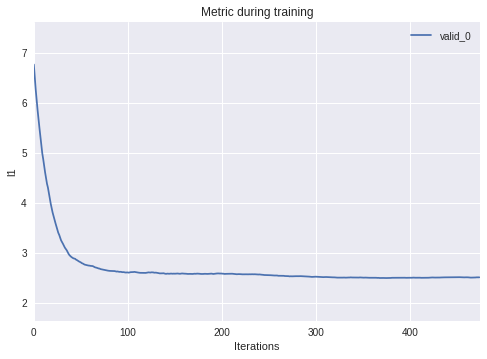

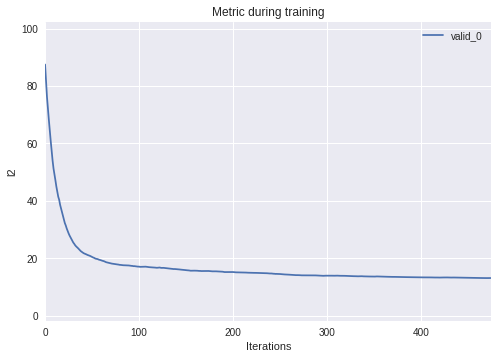

In [74]:
print('Plotting metrics recorded during training...')
ax = lgb.plot_metric(evals_result, metric='l1')
ab = lgb.plot_metric(evals_result, metric='l2')
plt.show()

In [75]:
print("Predicted Median : %2f" %np.median(Y_pred))
print("Test set Median : %2f" %np.median(Y_test))
print("Predicted Mean : %2f" %np.mean(Y_pred))
print("Test set Mean : %2f" %np.mean(Y_test))


Predicted Median : 20.964770
Test set Median : 20.700000
Predicted Mean : 22.237649
Test set Mean : 22.523952


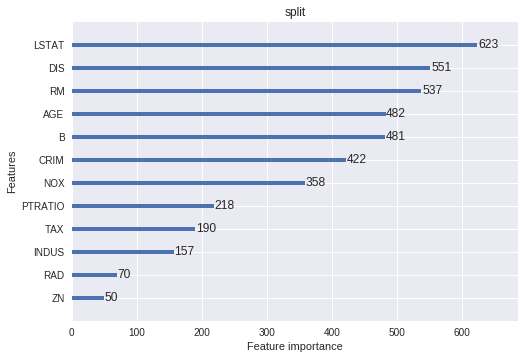

In [76]:
lgb.plot_importance(gbm, importance_type="split", title="split")
#this graph shows the importance of each features